In [1]:
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt


from scipy.stats import linregress
csv_path = os.path.join("data", "reduced_texas_df.csv")
texas_df = pd.read_csv(csv_path, encoding="utf-8")
texas_df.head()

,ID,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Description,City,State,...,Weather_Timestamp,Temperature(F),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,261002,201.0,2,11/30/2016 16:03,11/30/2016 17:20,30.336502,-97.755646,Accident on RM-2222 Northland Dr at Mo Pac Exp...,Austin,TX,...,11/30/2016 15:51,66.0,10.0,5.8,NaN,Clear,Day,Day,Day,Day
1,261003,201.0,2,11/30/2016 16:32,11/30/2016 17:47,30.328165,-97.694305,Accident on Grand Canyon Dr between Westheimer...,Austin,TX,...,11/30/2016 16:51,62.1,10.0,4.6,NaN,Clear,Day,Day,Day,Day
2,261004,201.0,2,11/30/2016 16:31,11/30/2016 17:46,30.326077,-97.692307,Accident on Saint Johns Ave at Cameron Rd.,Austin,TX,...,11/30/2016 16:51,62.1,10.0,4.6,NaN,Clear,Day,Day,Day,Day
3,261005,201.0,2,11/30/2016 16:06,11/30/2016 17:27,32.856014,-97.513084,#2 lane blocked and right hand shoulder blocke...,Fort Worth,TX,...,11/30/2016 16:00,NaN,NaN,NaN,NaN,NaN,Day,Day,Day,Day
4,261006,201.0,3,11/30/2016 16:35,11/30/2016 17:49,32.797668,-97.212090,#2 lane blocked and right hand shoulder blocke...,Fort Worth,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,Day,Day,Day,Day


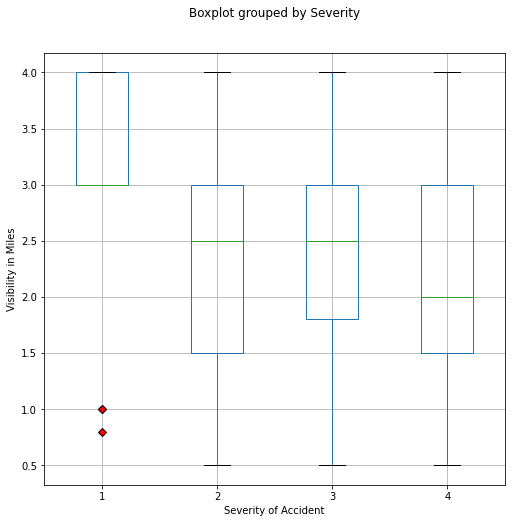

In [2]:
# Brittany's section 1
sev_vs_vis = texas_df[['Severity', 'Visibility(mi)']]
quartiles = sev_vs_vis.quantile([.25,.5,.75])
lowerq = quartiles.loc[0.25].values[0]
upperq = quartiles.loc[0.75].values[0]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
# Removing outliers for better graph
sev_vs_vis = sev_vs_vis[sev_vs_vis['Visibility(mi)'] <= upper_bound]
sev_vs_vis = sev_vs_vis[sev_vs_vis['Visibility(mi)'] >= lower_bound]
plot = sev_vs_vis.boxplot(by='Severity', figsize=(8,8), autorange=True, flierprops=dict(markerfacecolor='r', marker='D'))
plot.set_title('')
plot.set_ylabel('Visibility in Miles')
plot.set_xlabel('Severity of Accident')
fig = plot.get_figure()
fig.savefig('./vis_by_sev_boxplot.png')

,Visibility(mi),Total Count,Percentage of Accidents
0,"(0, 2]",12661,3.363307
1,"(2, 4]",12094,3.212687
2,"(4, 6]",12926,3.433702
3,"(6, 8]",19664,5.223605
4,"(8, 10]",306419,81.398079
5,"(10, 12]",292,0.077568
6,"(12, 14]",4683,1.244006
7,"(14, 16]",7,0.001860
8,"(16, 1000]",129,0.034268


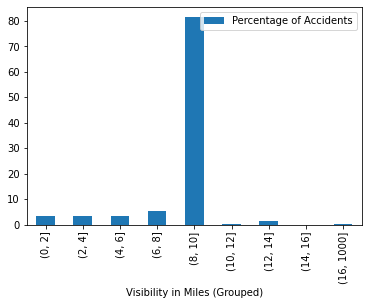

In [3]:
# Brittany's section 2
cut_bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 1000]
cut_labels = ['<10', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40+']
binned_data = texas_df.groupby([pd.cut(texas_df['Visibility(mi)'], bins=cut_bins)])
count_by_vis = binned_data.size()
fraction_of_tot_by_vis = count_by_vis.divide(texas_df.count().values[0]) * 100
percentage_by_vis = fraction_of_tot_by_vis.apply(lambda x: "{:.2f}%".format((x)))

final_df = pd.concat([count_by_vis, fraction_of_tot_by_vis], axis=1)
final_df = final_df.rename(columns={final_df.columns[0]: "Total Count", final_df.columns[1]: "Percentage of Accidents"}).reset_index()
display(final_df)
plot = final_df[['Visibility(mi)','Percentage of Accidents']].plot.bar(x='Visibility(mi)',y='Percentage of Accidents')
plot.set_title('')
plot.set_xlabel('Visibility in Miles (Grouped)')
fig = plot.get_figure()
fig.savefig('./percentage_of_accidents_by_vis_barplot.png')

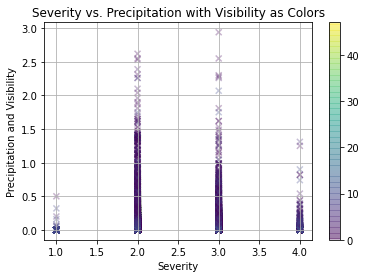

In [4]:
#Agust Plot 1
#Create triple variable scatter plot with x markers 
plt.scatter(texas_df["Severity"], texas_df["Precipitation(in)"], c=texas_df["Visibility(mi)"], marker="x", alpha=0.3)

#Create labels and titles
plt.xlabel("Severity")
plt.ylabel("Precipitation and Visibility")
plt.title("Severity vs. Precipitation with Visibility as Colors")

#Create colorbar
clb = plt.colorbar()

#Set label and grid
clb.set_label = ("Visbility")
plt.grid()

#Save as png
plt.savefig("Severity_and_Dual_Weather_factors.png")

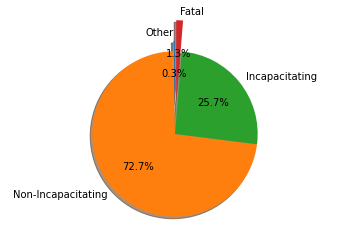

In [5]:
#Agust Plot 2
#Create number set, labels, and explode numbers
counts = [1079, 273773, 96624, 4969]
labels = "Other", "Non-Incapacitating", "Incapacitating", "Fatal"
explode = (0.1, 0, 0, 0.3)

#Create Figure and Axis
fig1, ax1 = plt.subplots()

#Create pie chart with formatting
ax1.pie(counts, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, radius=.8)

#Equalize Axis and show plot
ax1.axis('equal')
plt.show

#Save as png
plt.savefig("Severity_pie_chart.png")

In [6]:
#Jared's plot

#CONVERTING THE START TIME COLUMN TO "DATETIME" FORMAT.
texas_df['Start_Time'] = pd.to_datetime(texas_df['Start_Time'], errors='coerce')

In [7]:
#PULLING OUT JUST THE HOURS OF THE START TIME COLUMN SINCE BINS ONLY USE WHOLE NUMBERS.
hour_texas_df = texas_df['Start_Time'].dt.hour
hour_texas_df.head()

0    16.0
1    16.0
2    16.0
3    16.0
4    16.0
Name: Start_Time, dtype: float64

In [8]:
#CREATED 4 HOUR BLOCKS OF TIME FOR THE BINS.
bins = [0, 4, 8, 12, 16, 20, 24]
hour_groups = ["Midnight to 4am", "4am to 8am", "8am to Noon", "Noon to 4pm","4pm to 8pm", "8pm to Midnight"]

In [9]:
#CUTTING THE BIN TO MAKE A COLUMN OF DATA.
pd.cut(hour_texas_df, bins, labels=hour_groups).head()

0    Noon to 4pm
1    Noon to 4pm
2    Noon to 4pm
3    Noon to 4pm
4    Noon to 4pm
Name: Start_Time, dtype: category
Categories (6, object): ['Midnight to 4am' < '4am to 8am' < '8am to Noon' < 'Noon to 4pm' < '4pm to 8pm' < '8pm to Midnight']

In [10]:
#CREATED A COLUMN TO STORE PREVIOUS MADE COLUMN FROM THE BINS.
texas_df["Hour Group"] = pd.cut(hour_texas_df, bins, labels=hour_groups)
texas_df["Hour Group"].value_counts()

4am to 8am         98683
8am to Noon        88538
Noon to 4pm        79150
4pm to 8pm         74193
8pm to Midnight    19139
Midnight to 4am    13309
Name: Hour Group, dtype: int64

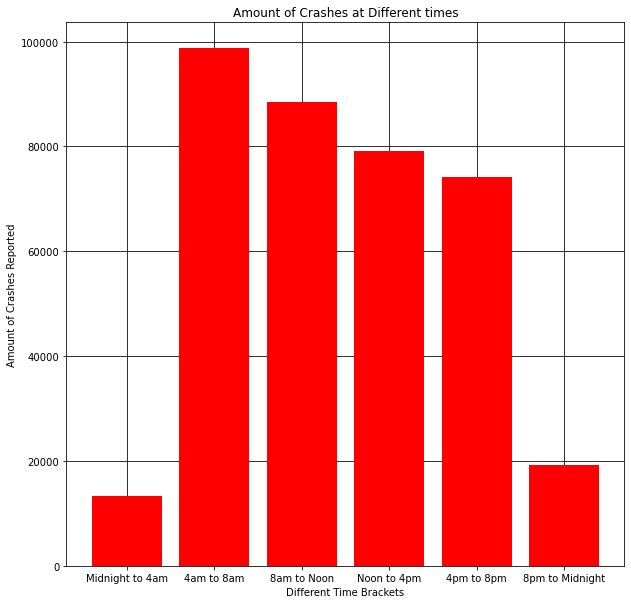

In [11]:
hour_groups = ["Midnight to 4am", "4am to 8am", "8am to Noon", "Noon to 4pm","4pm to 8pm", "8pm to Midnight"]

hour_nums = [13309, 98683, 88538, 79150, 74193, 19139]
plt.figure(figsize=(10,10))
plt.grid(zorder=0, color="black")
plt.bar(hour_groups, hour_nums, color="r", align="center", zorder=3)
plt.title("Amount of Crashes at Different times")
plt.xlabel("Different Time Brackets")
plt.ylabel("Amount of Crashes Reported")
plt.ylim(0, max(hour_nums)+5000)
plt.savefig("data/BarPlot.png")

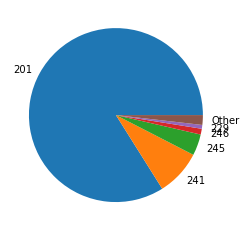

In [5]:
#carlo's plot 1
%matplotlib inline
import matplotlib.pyplot as plt
xp_vals = [252889,25671,11908,3237,2140,5458]
exp_labels = ["201","241","245","246","229","Other"]
plt.pie(xp_vals,labels=exp_labels)
plt.show()

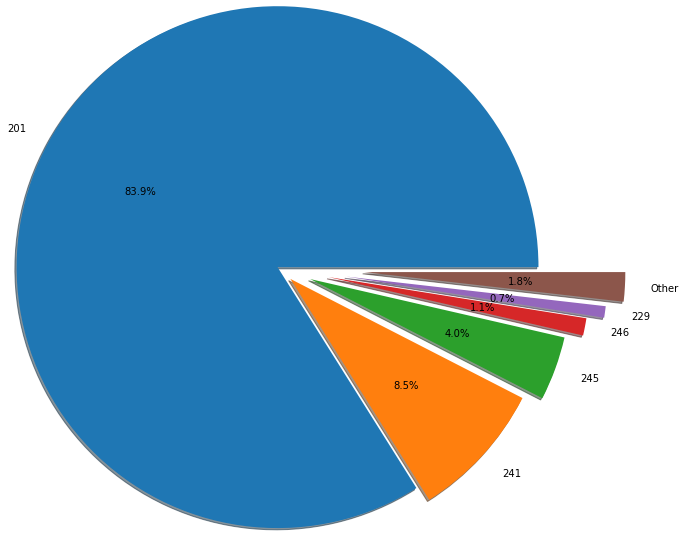

In [6]:
plt.axis("equal")
plt.pie(xp_vals,labels=exp_labels, shadow=True, autopct='%1.1f%%',radius=3,explode=[0, .2,.4,.6,.8,1])
plt.show()

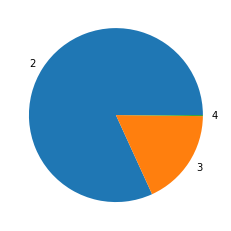

In [7]:
#Carlos plot 2
%matplotlib inline
import matplotlib.pyplot as plt
xp_vals = [206826,45450,487]
exp_labels = ["2","3","4"]
plt.pie(xp_vals,labels=exp_labels)
plt.show()

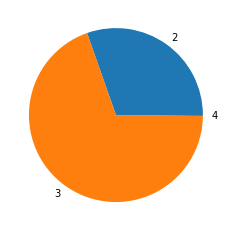

In [8]:
#Carlos plot 3
%matplotlib inline
import matplotlib.pyplot as plt
xp_vals = [7799,17819,47]
exp_labels = ["2","3","4"]
plt.pie(xp_vals,labels=exp_labels)
plt.show()

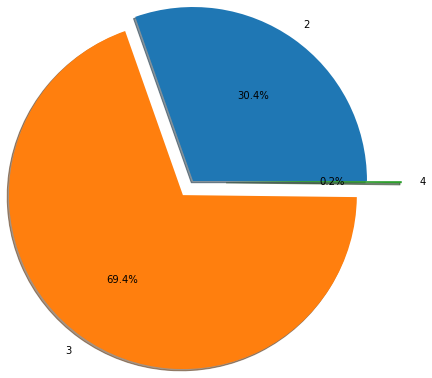

In [9]:
plt.axis("equal")
plt.pie(xp_vals,labels=exp_labels, shadow=True, autopct='%1.1f%%',radius=2,explode=[0, .2,.4])
plt.show()

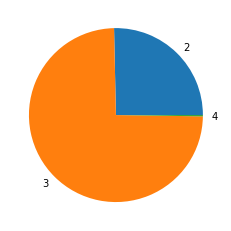

In [10]:
# Carlos plot 4
%matplotlib inline
import matplotlib.pyplot as plt
xp_vals = [3017,8860,28]
exp_labels = ["2","3","4"]
plt.pie(xp_vals,labels=exp_labels)
plt.show()

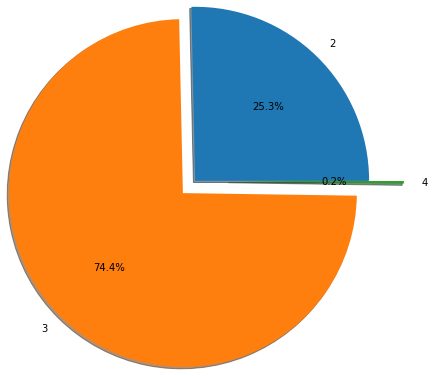

In [11]:
plt.axis("equal")
plt.pie(xp_vals,labels=exp_labels, shadow=True, autopct='%1.1f%%',radius=2,explode=[0, .2,.4])
plt.show()

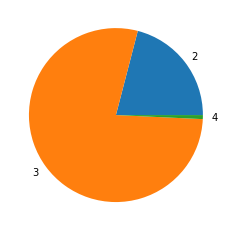

In [14]:
# Carlos plot 5
%matplotlib inline
import matplotlib.pyplot as plt
xp_vals = [678,2534,24]
exp_labels = ["2","3","4"]
plt.pie(xp_vals,labels=exp_labels)
plt.show()

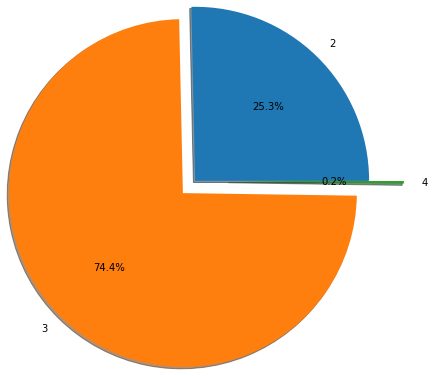

In [13]:
plt.axis("equal")
plt.pie(xp_vals,labels=exp_labels, shadow=True, autopct='%1.1f%%',radius=2,explode=[0, .2,.4])
plt.show()

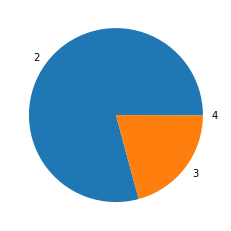

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
xp_vals = [1695,444,1]
exp_labels = ["2","3","4"]
plt.pie(xp_vals,labels=exp_labels)
plt.show()

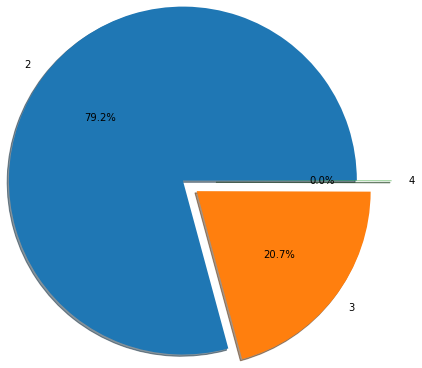

In [16]:
plt.axis("equal")
plt.pie(xp_vals,labels=exp_labels, shadow=True, autopct='%1.1f%%',radius=2,explode=[0, .2,.4])
plt.show()